# Making Classification Data 

In [ ]:
import torch 
from torch import nn
from pandas import DataFrame
from sklearn.datasets import make_circles

In [190]:
# make 1000 samples 
n_samples = 1000

# create circles
X, y = make_circles(n_samples, noise=0.05, random_state=42) # noise: adds some random noise to the data
len(X), len(y)

(1000, 1000)

In [191]:
print("first 5 samples of X:")
print(X[:5])
print("first 5 samples of y:")
print(y[:5])


first 5 samples of X:
[[ 0.74220688  0.24668576]
 [-0.7340323   0.16869164]
 [-0.82985872  0.22195899]
 [-0.42913559  0.67223019]
 [ 0.44560223 -0.89493556]]
first 5 samples of y:
[1 1 1 1 0]


In [192]:
print(y) # it's a binary classification problem because y has only 2 classes 0 and 1

[1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1
 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1
 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1
 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0
 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1
 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1
 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1
 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0
 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1
 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1
 0 0 0 1 0 0 0 0 0 1 1 1 

In [193]:
#  make a dataframe of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "label": y})
circles.head(10)

,X1,X2,label
0,0.742207,0.246686,1
1,-0.734032,0.168692,1
2,-0.829859,0.221959,1
3,-0.429136,0.672230,1
4,0.445602,-0.894936,0
5,-0.469885,0.708037,1
6,-0.016045,0.805623,1
7,0.759623,0.159526,1
8,-0.175692,-0.799837,1
9,-0.110616,1.042207,0


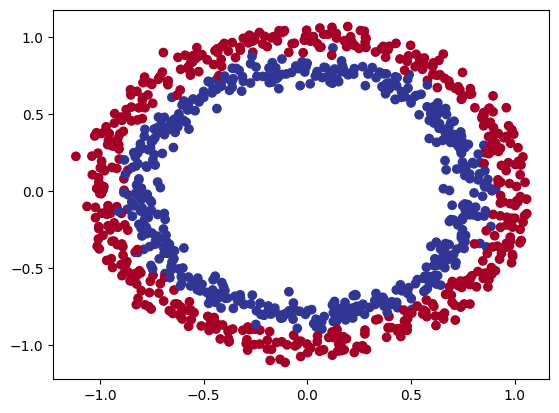

In [194]:
# visualize the data
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu) # this is a colormap


### the data is working with is often referred to as a toy dataset because it's relatively simple
### it's small enough to understand but large enough to be non-trivial

In [195]:
# check input and output shapes
X.shape, y.shape

((1000, 2), (1000,))

In [196]:
# view the first exmaple of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"values for one sample: {X_sample}, label: {y_sample}")
print(f"shape of sample: {X_sample.shape} and label: {y_sample.shape}")


values for one sample: [0.74220688 0.24668576], label: 1
shape of sample: (2,) and label: ()


In [197]:
# create a train and test split
# turn data into tensors
import torch
from torch import nn
torch.__version__
print(torch.cuda.is_available())

True


In [198]:
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

X[:5], y[:5]

(tensor([[ 0.7422,  0.2467],
         [-0.7340,  0.1687],
         [-0.8299,  0.2220],
         [-0.4291,  0.6722],
         [ 0.4456, -0.8949]]),
 tensor([1., 1., 1., 1., 0.]))

In [199]:
X.dtype, y.dtype, type(X), type(y)


(torch.float32, torch.float32, torch.Tensor, torch.Tensor)

In [200]:
# split data into training and test sets
from sklearn.model_selection import train_test_split # type: ignore
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42) # 80% training and 20% test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

In [201]:
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # input features = 2 (X1, X2) and output features = 5 (hidden layer with 5 neurons)
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # output layer with 1 neuron (binary classification)

       
        # activation function will be used in the forward pass
    def forward(self, x):
        return self.layer_2(self.layer_1(x)) # X-> layer_1 -> activation (not used here) -> layer_2 (output layer)


# instantiate the model and send it to device (GPU or CPU)

model_0 = CircleModelV0().to(device="cuda")
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [202]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=128),
    nn.ReLU(),
    nn.Linear(in_features=128, out_features=256),
    nn.ReLU(),
    nn.Linear(in_features=256, out_features=1),
    nn.ReLU()
    
)

In [203]:
next(model_0.parameters()).device

device(type='cpu')

In [204]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386],
                      [-0.6007,  0.5459],
                      [ 0.1177, -0.2296],
                      [ 0.4370,  0.1102],
                      [ 0.5713,  0.0773],
                      [-0.2230,  0.1900],
                      [-0.1918,  0.2976],
                      [ 0.6313,  0.4087],
                      [-0.3091,  0.4082],
                      [ 0.1265,  0.3591],
                      [-0.4310, -0.7000],
                      [-0.2732, -0.5424],
                      [ 0.5802,  0.2037],
                      [ 0.2929,  0.2236],
                      [-0.0123,  0.5534],
                      [-0.5024,  0.0445],
                      [-0.4826,  0.2180],
                      [-0.2435,  0.2167],
                      [-0.1473,  0.5865],
        

In [205]:
# make predictions 

# with torch.inference_mode():
#     untrained_predictions = model_0(X_test.to(device="cuda"))
# print(f"length of the predictions tensor: {len(untrained_predictions)}")
# print(f"first 10 predictions:\n {untrained_predictions[:10]}")
# # check the shape of the predictions tensor

# print(f"shape of the predictions tensor: {untrained_predictions.shape}")
# # check the shape of the predictions tensor



In [206]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=1, bias=True)
  (5): ReLU()
)

In [207]:
# setting up loss function and optimizer 
loss_fn = nn.BCEWithLogitsLoss() # binary cross entropy with logits loss function means we don't need to apply sigmoid activation function to the output layer

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [208]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386],
                      [-0.6007,  0.5459],
                      [ 0.1177, -0.2296],
                      [ 0.4370,  0.1102],
                      [ 0.5713,  0.0773],
                      [-0.2230,  0.1900],
                      [-0.1918,  0.2976],
                      [ 0.6313,  0.4087],
                      [-0.3091,  0.4082],
                      [ 0.1265,  0.3591],
                      [-0.4310, -0.7000],
                      [-0.2732, -0.5424],
                      [ 0.5802,  0.2037],
                      [ 0.2929,  0.2236],
                      [-0.0123,  0.5534],
                      [-0.5024,  0.0445],
                      [-0.4826,  0.2180],
                      [-0.2435,  0.2167],
                      [-0.1473,  0.5865],
        

In [209]:
#  calculate accuracy 
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [210]:
#  training the model
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test)[:5]
y_logits


tensor([[0.0633],
        [0.0637],
        [0.1094],
        [0.0780],
        [0.0642]])

In [211]:
# use the sigmoid activation function on our 
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5158],
        [0.5159],
        [0.5273],
        [0.5195],
        [0.5160]])

In [212]:
torch.round(y_pred_probs)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [213]:
# find the predicted labels 
y_preds = torch.round(y_pred_probs)

# logits -> pred_probs -> pred labels
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test)))


# check for equality
print(torch.eq(y_preds.squeeze(),  y_pred_labels.squeeze()[:5])) # check if the predicted labels are equal to the true labels


# get rid of extra dimension
y_pred_labels.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.], grad_fn=<SqueezeBackward0>)

In [214]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)


epochs = 1000




# build training and evaluation loop 
for epoch in range(epochs):
    model_0.train()
    
    # forward pass
    y_logits = model_0(X_train).squeeze()
    
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> labels
    
    # calculate loss/accuracy 
    # we need to pass logits to BceWithLogits expects raw logits
    loss = loss_fn(y_logits, 
                   y_train)
    
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    
    optimizer.zero_grad()
    
    loss.backward() # backpropagation
    
    optimizer.step() # update weights and biases
    
    # testing 
    
    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        # calculate the test loss 
        test_loss = loss_fn(test_logits, y_test)
        
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
        
    if epoch % 10 == 0:
        print(f"epoch {epoch} | "
              f"train loss: {loss:.5f} | "
              f"train acc: {acc:.2f}% | "
              f"test loss: {test_loss:.5f} | "
              f"test acc: {test_acc:.2f}%")



epoch 0 | train loss: 0.69681 | train acc: 50.00% | test loss: 0.69460 | test acc: 50.00%
epoch 10 | train loss: 0.69274 | train acc: 48.25% | test loss: 0.69273 | test acc: 57.50%
epoch 20 | train loss: 0.69135 | train acc: 57.50% | test loss: 0.69133 | test acc: 54.00%
epoch 30 | train loss: 0.68847 | train acc: 58.38% | test loss: 0.68920 | test acc: 50.00%
epoch 40 | train loss: 0.68607 | train acc: 50.00% | test loss: 0.68684 | test acc: 53.50%
epoch 50 | train loss: 0.68311 | train acc: 51.12% | test loss: 0.68472 | test acc: 58.00%
epoch 60 | train loss: 0.68046 | train acc: 50.88% | test loss: 0.68247 | test acc: 56.00%
epoch 70 | train loss: 0.67757 | train acc: 52.25% | test loss: 0.68016 | test acc: 56.00%
epoch 80 | train loss: 0.67465 | train acc: 52.62% | test loss: 0.67779 | test acc: 56.00%
epoch 90 | train loss: 0.67160 | train acc: 53.50% | test loss: 0.67539 | test acc: 55.00%
epoch 100 | train loss: 0.66844 | train acc: 54.12% | test loss: 0.67286 | test acc: 55.50%

In [215]:
loss_fn

BCEWithLogitsLoss()

In [216]:
import requests
from pathlib import Path

# download helper functions if it's not already downloaded
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download...")
else:
    print("downloading helper_functions.py...")
    request = requests.get(
        "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py"
    )
    
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)
        
from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download...


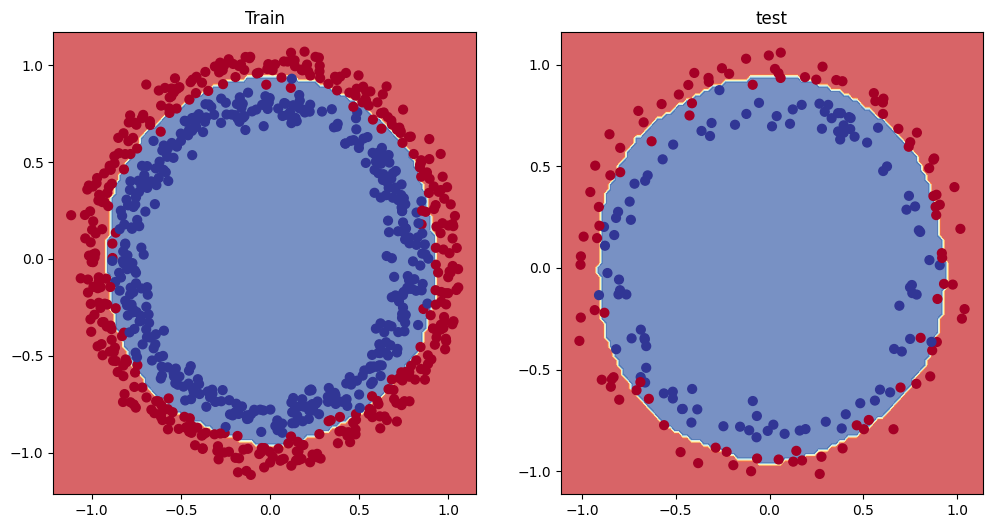

In [217]:
# plot decision boundary of a model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_0, X_test, y_test)

In [218]:
# improving a model

class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        
    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x)))

In [219]:
model_1 = CircleModelV1().to(device="cuda")
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

In [220]:
# create loss function
loss_fn_1 = nn.BCEWithLogitsLoss()
# create an optimzer 
optimizer_1 = torch.optim.SGD(params=model_1.parameters(), lr=0.1)



In [221]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [222]:
# training and evaluation loop

# training and evaluation loop

epochs_1 = 1000
for epoch in range(epochs_1):
    model_1.train()
    # Move tensors to CUDA
    X_train_cuda = X_train.to(device="cuda")
    y_train_cuda = y_train.to(device="cuda")
    
    # Forward pass
    y_logits_1 = model_1(X_train_cuda).squeeze()
    y_pred_1 = torch.round(torch.sigmoid(y_logits_1))

    # Compute loss and accuracy
    loss_1 = loss_fn_1(y_logits_1, y_train_cuda)
    acc = accuracy_fn(y_true=y_train_cuda, y_pred=y_pred_1)
    
    optimizer.zero_grad()  # Clear gradients after each step


    # Backward pass and optimization
    loss_1.backward()
    optimizer.step()

    model_1.eval()
    with torch.inference_mode():
        X_test_cuda = X_test.to(device="cuda")
        y_test_cuda = y_test.to(device="cuda")
    
        test_logits_1 = model_1(X_test_cuda).squeeze()
        test_pred_1 = torch.round(torch.sigmoid(test_logits_1))
        test_loss_1 = loss_fn_1(test_logits_1, y_test_cuda)
        test_acc_1 = accuracy_fn(y_true=y_test_cuda, y_pred=test_pred_1)

    if epoch % 10 == 0:
        print(
            f"epoch {epoch} | "
            f"train loss: {loss_1:.5f} | "
            f"train acc: {acc:.2f}% | "
            f"test loss: {test_loss_1:.5f} | "
            f"test acc: {test_acc_1:.2f}%"
        )

epoch 0 | train loss: 0.69393 | train acc: 51.00% | test loss: 0.69263 | test acc: 51.00%
epoch 10 | train loss: 0.69393 | train acc: 51.00% | test loss: 0.69263 | test acc: 51.00%
epoch 20 | train loss: 0.69393 | train acc: 51.00% | test loss: 0.69263 | test acc: 51.00%
epoch 30 | train loss: 0.69393 | train acc: 51.00% | test loss: 0.69263 | test acc: 51.00%
epoch 40 | train loss: 0.69393 | train acc: 51.00% | test loss: 0.69263 | test acc: 51.00%
epoch 50 | train loss: 0.69393 | train acc: 51.00% | test loss: 0.69263 | test acc: 51.00%
epoch 60 | train loss: 0.69393 | train acc: 51.00% | test loss: 0.69263 | test acc: 51.00%
epoch 70 | train loss: 0.69393 | train acc: 51.00% | test loss: 0.69263 | test acc: 51.00%
epoch 80 | train loss: 0.69393 | train acc: 51.00% | test loss: 0.69263 | test acc: 51.00%
epoch 90 | train loss: 0.69393 | train acc: 51.00% | test loss: 0.69263 | test acc: 51.00%
epoch 100 | train loss: 0.69393 | train acc: 51.00% | test loss: 0.69263 | test acc: 51.00%

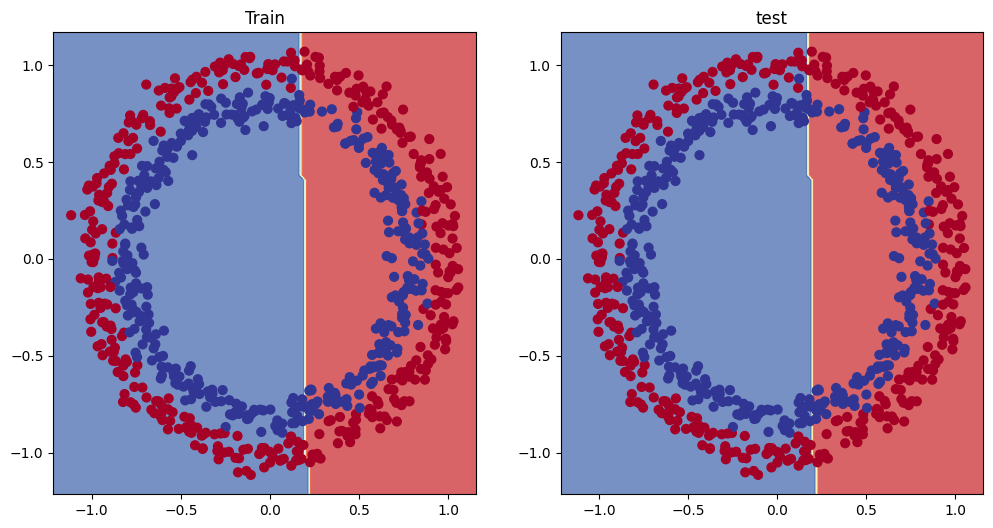

In [223]:
# plot the decision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_1, X_train, y_train)

# preparing data to see our model will fit the data in a straight line



In [224]:
# create some data same as linear regression 

weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01
X_regression = torch.arange(start=start, end=end, step=step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

len(X_regression), len(y_regression)



(100, 100)

In [225]:
# train test split 
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]


len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression)

(80, 80, 20, 20)

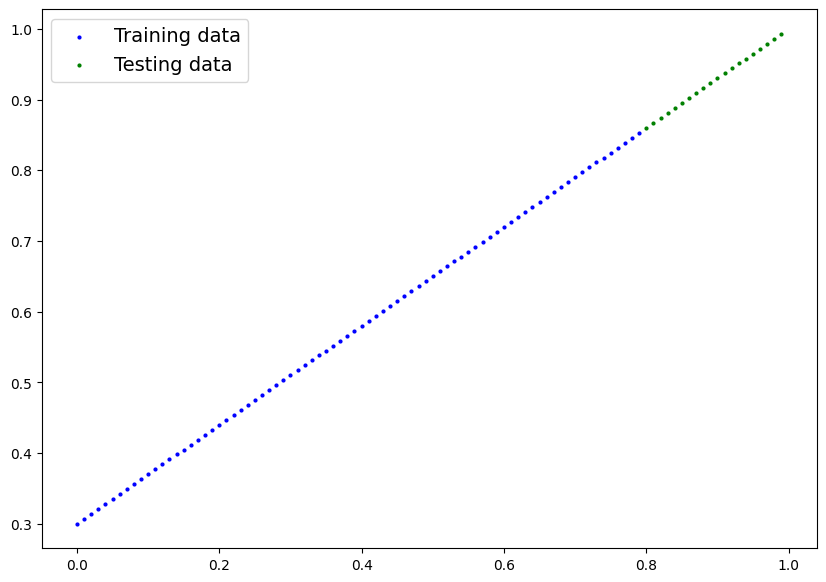

In [226]:
plot_predictions(train_data=X_train_regression,
                 test_data=X_test_regression,
                 train_labels=y_train_regression,
                 test_labels=y_test_regression)

In [227]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [228]:
# adjust model_1 to fit to a straight line data 
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device="cuda")

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [229]:
# loss and optimizer 

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.01)

In [230]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Move data to CUDA
X_train_regression = X_train_regression.to(device="cuda")
y_train_regression = y_train_regression.to(device="cuda")
X_test_regression = X_test_regression.to(device="cuda")
y_test_regression = y_test_regression.to(device="cuda")

epochs = 2000

for epoch in range(epochs):
    model_2.train()

    # Forward pass on CUDA
    y_pred = model_2(X_train_regression)

    # Compute loss on CUDA
    loss = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_2.eval()
    with torch.inference_mode():
        # Forward pass on test data (CUDA)
        y_test_pred = model_2(X_test_regression)
        test_loss = loss_fn(y_test_pred, y_test_regression)

        if epoch % 100 == 0:
        # Print losses
            print(f"epoch {epoch} | train loss: {loss:.5f} | test loss: {test_loss:.5f}")

epoch 0 | train loss: 0.75986 | test loss: 0.91103
epoch 100 | train loss: 0.02858 | test loss: 0.00081
epoch 200 | train loss: 0.02533 | test loss: 0.00209
epoch 300 | train loss: 0.02137 | test loss: 0.00305
epoch 400 | train loss: 0.01964 | test loss: 0.00341
epoch 500 | train loss: 0.01940 | test loss: 0.00387
epoch 600 | train loss: 0.01903 | test loss: 0.00379
epoch 700 | train loss: 0.01878 | test loss: 0.00381
epoch 800 | train loss: 0.01840 | test loss: 0.00329
epoch 900 | train loss: 0.01798 | test loss: 0.00360
epoch 1000 | train loss: 0.01782 | test loss: 0.00333
epoch 1100 | train loss: 0.01674 | test loss: 0.00317
epoch 1200 | train loss: 0.01640 | test loss: 0.00316
epoch 1300 | train loss: 0.01648 | test loss: 0.00256
epoch 1400 | train loss: 0.01648 | test loss: 0.00323
epoch 1500 | train loss: 0.01632 | test loss: 0.00337
epoch 1600 | train loss: 0.01596 | test loss: 0.00284
epoch 1700 | train loss: 0.01458 | test loss: 0.00244
epoch 1800 | train loss: 0.01532 | test 

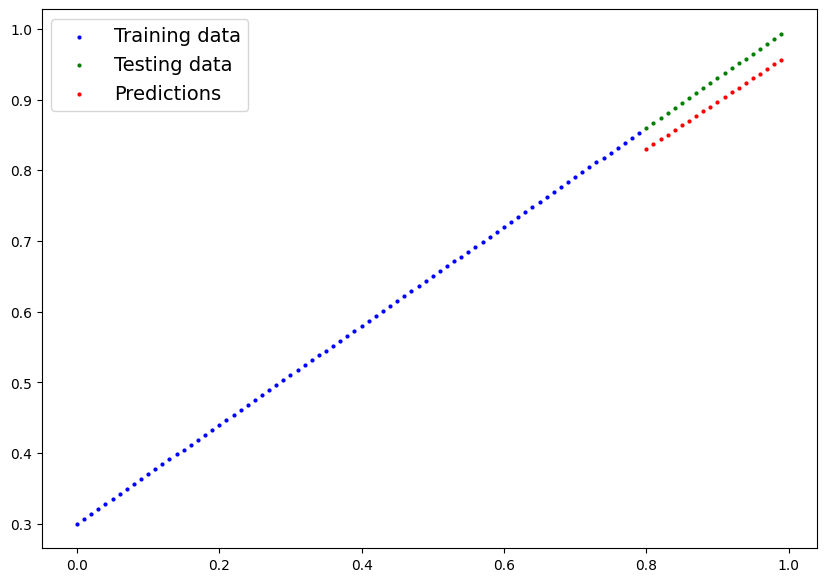

In [231]:
model_2.eval()
with torch.inference_mode():
    predictions = model_2(X_test_regression)
    plot_predictions(train_data=X_train_regression.cpu(),
                     test_data=X_test_regression.cpu(),
                     train_labels=y_train_regression.cpu(),
                     test_labels=y_test_regression.cpu(),
                     predictions=predictions.cpu())

# the missing piece, non linearity 

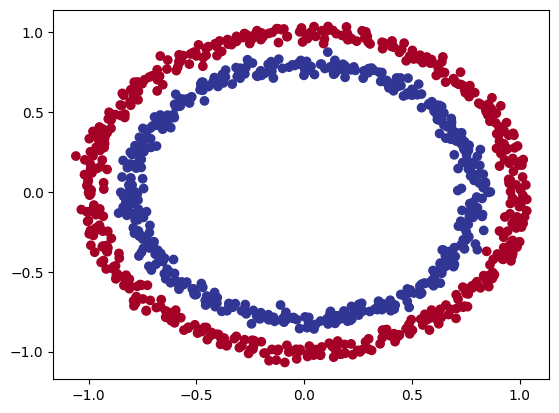

In [232]:
# make and plot data

n_samples = 1000
X,y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [243]:
from sklearn.model_selection import train_test_split

# Convert PyTorch tensors to NumPy arrays
X_np = X.cpu().numpy()  # Convert to NumPy
y_np = y.cpu().numpy()  # Convert to NumPy

# Use train_test_split with NumPy arrays
X_train, X_test, y_train, y_test = train_test_split(
    X_np, y_np, test_size=0.2, random_state=42
)

# Convert back to PyTorch tensors and move to CUDA
X_train = torch.from_numpy(X_train).type(torch.float32).to(device="cuda")
X_test = torch.from_numpy(X_test).type(torch.float32).to(device="cuda")
y_train = torch.from_numpy(y_train).type(torch.float32).to(device="cuda")
y_test = torch.from_numpy(y_test).type(torch.float32).to(device="cuda")

# building a model with non linearity 

In [244]:
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        
        # non linear activation function 
        self.relu = nn.ReLU()
        
    def forward(self, x):
        # where should we put our non linear activation function 
        # x -> layer_1 -> relu -> layer_2 -> relu -> layer_3
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    
    
model_3 = CircleModelV2().to(device="cuda")

model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

In [245]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.01)



In [246]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [247]:
epochs = 1000

for epoch in range(epochs):
    model_3.train()
    y_preds = model_3(X_train).to(device="cuda")
    loss = loss_fn(y_preds, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model_3.eval()
    
    with torch.inference_mode():
        test_predictions = model_3(X_test)
        test_loss = loss_fn(test_predictions, y_test)
        
        if epoch % 10 == 0:
            print(f"epoch {epoch} | train loss: {loss:.5f} | test loss: {test_loss:.5f}")
        

ValueError: Target size (torch.Size([800])) must be the same as input size (torch.Size([800, 1]))